# Matrices (Rank 2 Tensors) in NumPy

In [1]:
import numpy as np

In [2]:
# use array() with nested bresckets:
X = np.array([[25,2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [3]:
X.shape

(3, 2)

In [4]:
X.size

6

In [12]:
# select left column of matrix X (zero-indexed)
X[:,0]

array([25,  5,  3])

In [13]:
# Select middle row of matrix X:
X[1,:]

array([ 5, 26])

In [25]:
# Another slicing-by-index example:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

In [30]:
import torch

In [27]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [28]:

X_pt.shape # pythonic relative to TensorFlow

torch.Size([3, 2])

In [29]:
X_pt[1,:] # N.B.: Python is zero-indexed; written algebra is one-indexed

tensor([ 5, 26])

# Tensor Transposition

In [32]:
x = np.array([[25, 2], [5, 26], [-2, 7]])
x

array([[25,  2],
       [ 5, 26],
       [-2,  7]])

In [33]:
x.T

array([[25,  5, -2],
       [ 2, 26,  7]])

# Basic Arithmetical Properties
Adding or multiplying with scalar applies operation to all elements and tensor shape is retained:

In [34]:
x

array([[25,  2],
       [ 5, 26],
       [-2,  7]])

In [35]:
x * 2

array([[50,  4],
       [10, 52],
       [-4, 14]])

In [36]:
x + 2

array([[27,  4],
       [ 7, 28],
       [ 0,  9]])

In [37]:
x * 2 + 2

array([[52,  6],
       [12, 54],
       [-2, 16]])

In [38]:
X_pt*2+2 # Python operators are overloaded; could alternatively use torch.mul() or torch.add()


tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [39]:
torch.add(torch.mul(X_pt, 2), 2)


tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [40]:
X


array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [41]:
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [42]:
A + X


array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [43]:
A * X


array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

# Reduction

Calculating the sum across all elements of a tensor is a common operation. For example:

* For vector ***x*** of length *n*, we calculate $\\sum_{i=1}^{n} x_i$\n",
* For matrix ***X*** with *m* by *n* dimensions, we calculate $\\sum_{i=1}^{m} \\sum_{j=1}^{n} X_{i,j}$


In [50]:
X


array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [51]:
X.sum()


68

In [52]:
torch.sum(X_pt)


tensor(68)

In [53]:
# Can also be done along one specific axis alone, e.g.:
X.sum(axis=0) # summing over all rows

array([33, 35])

In [55]:
X.sum(axis=1) # summing over all columns

array([27, 31, 10])

In [56]:
torch.sum(X_pt, 0)


tensor([33, 35])

# Dot Product

If we have two vectors (say, ***x*** and ***y***) with the same length *n*, we can calculate the dot product between them. This is annotated several different ways, including the following:

* $x \cdot y$
* $x^Ty$
* $\langle x,y \rangle$
        
Regardless which notation you use (I prefer the first), the calculation is the same; we calculate products in an element-wise fashion and then sum reductively across the products to a scalar value. That is, $x \\cdot y = \\sum_{i=1}^{n} x_i y_i$

The dot product is ubiquitous in deep learning: It is performed at every artificial neuron in a deep neural network, which may be made up of millions (or orders of magnitude more) of these neurons.


In [60]:
y = np.array([25, 2, 5])
y

array([25,  2,  5])

In [61]:
z = np.array([0, 1, 2])
z

array([0, 1, 2])

In [62]:
np.dot(y,z)

12

In [63]:
25*0 + 2*1 + 5*2

12

# Solving Linear System

In the **Substitution** example, the two equations in the system are:\n",
    $$ y = 3x $$
    $$ -5x + 2y = 2 $$
The second equation can be rearranged to isolate y:
    $$ 2y = 2 + 5x $$
    $$ y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2} $$

In [64]:
x = np.linspace(-10, 10, 1000) # start, finish, n points

In [65]:
y1 = 3 * x
y2 = 1 + (5*x)/2


In [73]:
import matplotlib.pyplot as plt

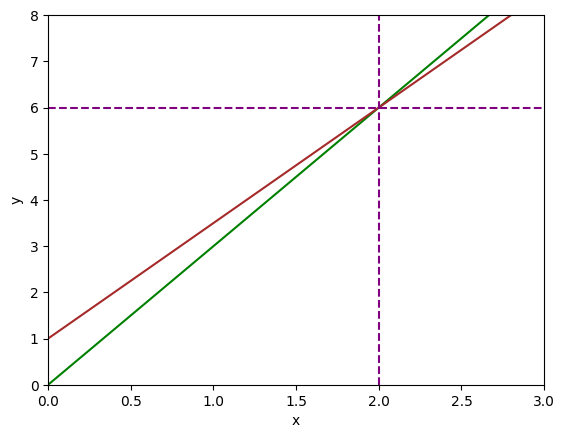

In [74]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 3])
ax.set_ylim([0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

In the **Elimination** example, the two equations in the system are:
    $$ 2x - 3y = 15 $$
    $$ 4x + 10y = 14 $$

Both equations can be rearranged to isolate $y$. Starting with the first equation:
    $$ -3y = 15 - 2x $$
    $$ y = \frac{15 - 2x}{-3} = -5 + \frac{2x}{3} $$

Then for the second equation:
    $$ 4x + 10y = 14 $$
    $$ 2x + 5y = 7 $$
    $$ 5y = 7 - 2x $$
    $$ y = \frac{7 - 2x}{5} $$

In [75]:
y1 = -5 + (2*x)/3
y2 = (7-2*x)/5

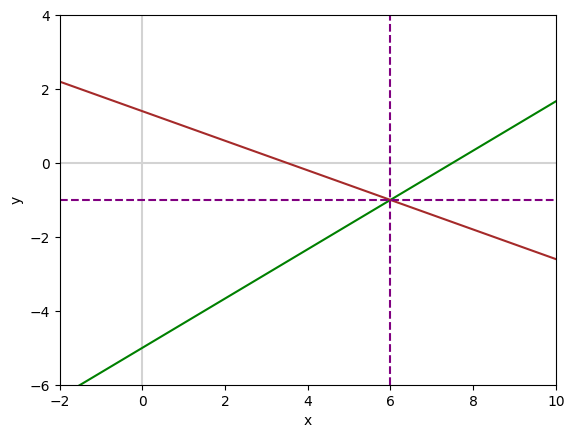

In [76]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# Add x and y axes:
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=6, color='purple', linestyle='--')
_ = plt.axhline(y=-1, color='purple', linestyle='--')